In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [2]:
# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
# Don't show numbers in scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving IBM Attrition Data.csv to IBM Attrition Data.csv


In [4]:
attrition_df = pd.read_csv("IBM Attrition Data.csv")
attrition_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [5]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [6]:
attrition_df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

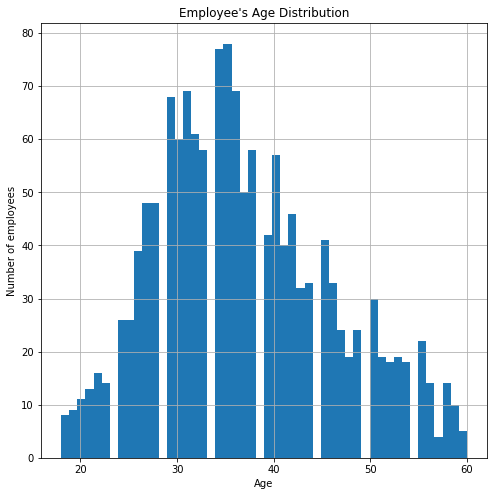

In [7]:
# generating histogram for age
plt.figure(figsize = (8,8))
attrition_df['Age'].hist(bins = 50)
plt.title("Employee's Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of employees")
plt.show()

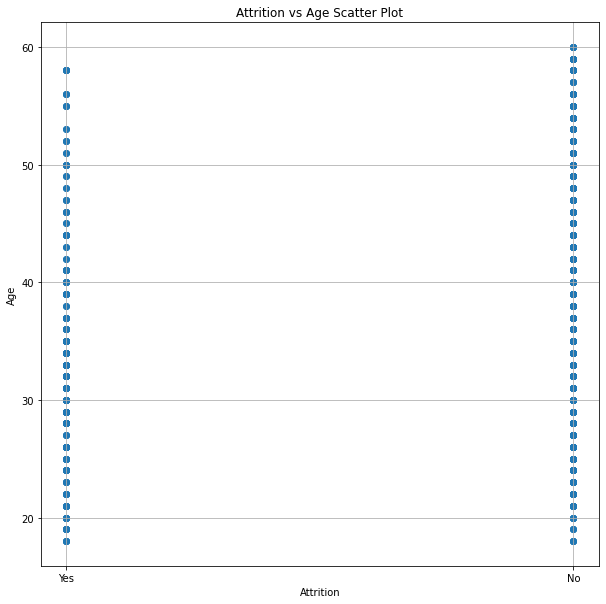

In [8]:
# plotting attrition versus age
plt.figure(figsize = (10,10))
plt.scatter(attrition_df.Attrition, attrition_df.Age)
plt.title("Attrition vs Age Scatter Plot")
plt.ylabel("Age")
plt.xlabel("Attrition")
plt.grid()
plt.show()

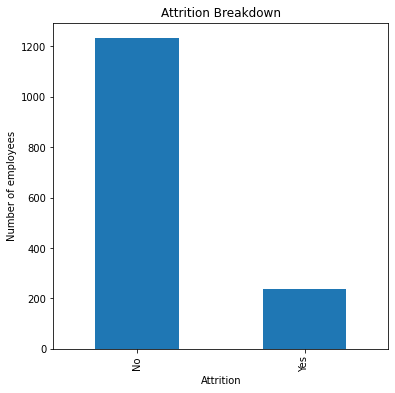

In [9]:
# Breakdown for left employees

plt.figure(figsize = (6,6))
attrition_df.Attrition.value_counts().plot(kind = "bar")
plt.title("Attrition Breakdown")
plt.xlabel("Attrition")
plt.ylabel("Number of employees")
plt.show()

In [10]:
attrition_df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

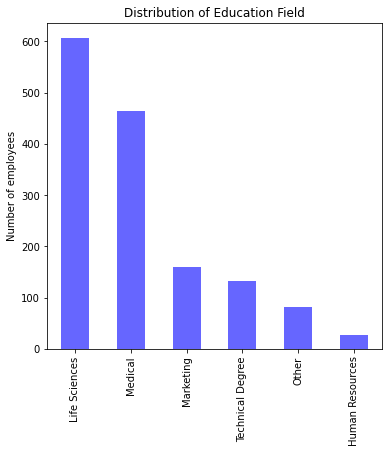

In [11]:
# Employee Distribution according to EducationField

plt.figure(figsize = (6,6))
attrition_df.EducationField.value_counts().plot(kind = "bar", color = 'blue', alpha = 0.6)
plt.title("Distribution of Education Field")
plt.ylabel("Number of employees")
plt.show()

In [12]:
attrition_df["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

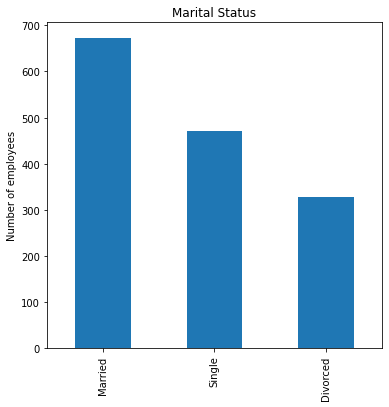

In [13]:
# Bar chart for Marital Status

plt.figure(figsize = (6,6))
attrition_df.MaritalStatus.value_counts().plot(kind = "bar")
plt.title("Marital Status")
plt.ylabel("Number of employees")
plt.show()

In [14]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [15]:
attrition_df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,9.19,2.91,2.72,2.73,6502.93,2.69,2.76,7.01
std,9.14,8.11,1.02,1.09,1.10,4707.96,2.50,0.71,6.13
min,18.00,1.00,1.00,1.00,1.00,1009.00,0.00,1.00,0.00
25%,30.00,2.00,2.00,2.00,2.00,2911.00,1.00,2.00,3.00
50%,36.00,7.00,3.00,3.00,3.00,4919.00,2.00,3.00,5.00
75%,43.00,14.00,4.00,4.00,4.00,8379.00,4.00,3.00,9.00
max,60.00,29.00,5.00,4.00,4.00,19999.00,9.00,4.00,40.00


In [16]:
attrition_df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [17]:
attrition_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [18]:
attrition_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [19]:
attrition_df['Attrition'].replace('Yes', 1, inplace = True)
attrition_df['Attrition'].replace('No', 0, inplace = True)

In [20]:
attrition_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [21]:
# Building Logistic Regression Model

X = attrition_df.drop(['Attrition'], axis = 1)
Y = attrition_df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [22]:
attrition_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [23]:
attrition_df["EducationField"] = (
    attrition_df["EducationField"]
    .replace({"Life Sciences": 1, "Medical": 2, "Marketing": 3, "Other": 4, "Technical Degree": 5, "Human Resources": 6})
    )

In [24]:
attrition_df['EducationField'].unique()

array([1, 4, 2, 3, 5, 6])

In [25]:
attrition_df['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [26]:
attrition_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [27]:
attrition_df['Department'] = (
    attrition_df['Department'].
    replace({"Research & Development": 1, "Sales": 2, "Human Resources": 3})
)

In [28]:
attrition_df['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [29]:
attrition_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,Single,5993,8,1,6
1,49,0,1,8,1,1,3,2,Married,5130,1,3,10
2,37,1,1,2,2,4,4,3,Single,2090,6,3,0
3,33,0,1,3,4,1,4,3,Married,2909,1,3,8
4,27,0,1,2,1,2,1,2,Married,3468,9,3,2


In [30]:
attrition_df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [31]:
attrition_df['MaritalStatus'] = (
    attrition_df["MaritalStatus"].replace({"Married": 1, "Single": 2, "Divorced": 3})
)

In [32]:
attrition_df['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [33]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   Department               1470 non-null   int64
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int64
 5   EducationField           1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int64
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int64(13)
memory usage: 149.4 KB


In [34]:
attrition_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [36]:
x=attrition_df.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [37]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [38]:
y = attrition_df['Attrition']

In [39]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [41]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  attrition_df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [42]:
y = np.ravel(y)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [44]:
y.mean()

0.16122448979591836

In [45]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [46]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [47]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.86179629 0.13820371]
 [0.80754595 0.19245405]
 [0.74123953 0.25876047]
 [0.83441331 0.16558669]
 [0.73499944 0.26500056]
 [0.7909775  0.2090225 ]
 [0.85615202 0.14384798]
 [0.85699674 0.14300326]
 [0.96699053 0.03300947]
 [0.93685203 0.06314797]
 [0.95099268 0.04900732]
 [0.83101544 0.16898456]
 [0.86296552 0.13703448]
 [0.86581192 0.13418808]
 [0.88750595 0.11249405]
 [0.88892618 0.11107382]
 [0.88569719 0.11430281]
 [0.78516588 0.21483412]
 [0.79794491 0.20205509]
 [0.88511296 0.11488704]
 [0.7065161  0.2934839 ]
 [0.94676686 0.05323314]
 [0.86736256 0.13263744]
 [0.84276457 0.15723543]
 [0.60336877 0.39663123]
 [0.81129201 0.18870799]
 [0.91813724 0.08186276]
 [0.93285519 0.06714481]
 [0.68230779 0.31769221]
 [0.87027131 0.12972869]
 [0.87266382 0.12733618]
 [0.76968745 0.23031255]
 [0.8643576  0.1356424 ]
 [0.95758874 0.04241126]
 [0.84461482 0.15538518]
 [0.86719352 0.13280648]
 [0.90465972 0.09534028]
 [0.68936434 0.31063566]
 [0.90703612 0.09296388]
 [0.80663482 0.19336518]


In [49]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6502502887947632


In [50]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [52]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338        1.00 30.00        2.00              5.00       3.00   
363        1.00 33.00        2.00              5.00       3.00   
759        1.00 45.00        3.00             24.00       4.00   
793        1.00 28.00        1.00             15.00       2.00   
581        1.00 30.00        1.00              1.00       3.00   
...         ...   ...         ...               ...        ...   
763        1.00 34.00        2.00             10.00       4.00   
835        1.00 35.00        3.00              8.00       4.00   
1216       1.00 43.00        2.00              2.00       3.00   
559        1.00 38.00        1.00              2.00       5.00   
684        1.00 40.00        2.00             10.00       4.00   

      EducationField  YearsAtCompany  
338             3.00           10.00  
363             3.00            1.00  
759             2.00            6.00  
793             1.00            4.00  
581         

In [54]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[6.25571946e-07 9.99999374e-01]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
